<h3>Problem Statement</h3>
<p>Kowope Mart is a Nigerian-based retail company with a vision to provide quality goods, education and automobile services to its customers at affordable price and reduce if not eradicate charges on card payments and increase customer satisfaction with credit rewards that can be used within the Mall. To achieve this, the company has partnered with DSBank on co-branded credit card with additional functionality such that customers can request for loan, pay for goods even with zero-balance and then pay back within an agreed period of time. This innovative strategy has increased sales for the company. However, there has been recent cases of credit defaults and Kowope Mart will like to have a system that profiles customers who are worthy of the card with minimum if not zero risk of defaulting.</p>

<h4>Objective</h4> To predict customers who are likely to default or not.
<h4>Model Used</h4> Catboost classifier
<h4>Evauation Metric</h4> Area under the ROC Curve(AUC)


<h3>Variable Definitions</h3>
<ul>
    <li> Application_ID: Unique Customer Application Identification number </li>

<strong>Risk Scoring features:</strong>
    <li>form_field1: Customer Creditworthiness score based on historical data</li>
    <li>form_field2: A score that measures the number and riskiness of credit enquiries made by a borrower.</li>
    
<strong>Severity features:</strong> Severity is a function of amount, time since default, and number of defaults
    <li>form_field3: Severity of default by the borrower on any loan(s).</li>
    <li>form_field4: Severity of default by the borrower on auto loan(s).</li>
    <li>form_field5: Severity of default by the borrower on education loan(s).</li>

<strong>Credit features</strong>

   <li>form_field6: Minimum of credit available on all credit cards that is automatically renewed as debts are paid off on the
    customer’s cards (in NGN)</li>
    <li>form_field7: Maximum of credit available on customer’s active credit lines (in NGN)</li>
    <li>form_field8: Maximum of credit available on all active credit cards that is automatically renewed as debts are paid off
    on the customer’s cards (in NGN)</li>
    <li>form_field9: Sum of available credit on credit cards that the borrower has missed 1 payment (in NGN)</li>
    <li>form_field10: Total amount of credit available on accepted credit lines (in NGN)
    <li>form_field11: The amount of dues collected post-default where the due amount was more than 500 (in NGN)</li>
    <li>form_field12: Sum of the amount due on active credit cards (in NGN)</li>
    <li>form_field13: Annual amount paid towards all credit cards during the previous year (in NGN)</li>
    <li>form_field14: Annual income (in NGN)</li>
    <li>form_field15: The estimated market value of a property owned/used by the borrower (in NGN)</li>

<strong>Credit card features:</strong>
    <li>form_field16: Number of active credit card that is automatically renewed as debts are paid off on which full credit
    limit is utilized by the borrower</li>
    <li>form_field17: Number of active credit cards on which full credit limit is utilized by the borrower</li>
    <li>form_field18: Number of active credit lines on which full credit limit is utilized by the borrower</li>
    <li>form_field19: Number of active credit cards on which at least 75% credit limit is utilized by the borrower</li>
    <li>form_field20: Number of active credit lines on which at least 75% credit limit is utilized by the borrower</li>
    <li>form_field21: Average utilization of active revolving credit card loans (%)</li>
    <li>form_field22: Average utilization of line on all active credit lines activated in last 2 years (%)</li>
    <li>form_field23: Average utilization of line on all active credit cards activated in last 1 year (%)</li>
    <li>form_field24: Average utilization of line on credit cards on which the borrower has missed 1 payment during the last 6 months (%)</li>
    <li>form_field25: Average tenure of active revolving credit cards (in days)</li>
    <li>form_field26: Tenure of oldest credit card among all active credit cards (in days)</li>
    <li>form_field27: Tenure of oldest revolving credit card among all active revolving credit cards (in days)</li>

<strong>Time-related features</strong>
    <li>form_field28: Number of days since last missed payment on any credit line</li>
    <li>form_field29: Tenure of the oldest credit line (in days)</li>
    form_field30: Maximum tenure on all auto loans (in days)</li>
    <li>form_field31: Maximum tenure on all education loans (in days)</li>
    <li>form_field32: Sum of tenures (in months) of active credit cards</li>
    <li>form_field33: Sum of tenures (in months) of active credit cards</li>
    <li>form_field34: Number of active credit lines over the last 6 months on which the borrower has missed 1 payment</li>
    <li>form_field35: Number of revolving credit cards over the last 2 years on which the borrower has missed 1 payment</li>
    <li>form_field36: Number of active credit lines</li>
    <li>form_field37: Number of credit cards with an active tenure of at least 2 years</li>
    <li>form_field38: Number of credit lines activated in the last 2 years</li>
    <li>form_field39: Number of credit lines on which the borrower has current delinquency</li>

<strong>Percentage related features</strong>
    <li>form_field40: Utilization of line on active education loans (%)</li>
    <li>form_field41: Utilization of line on active auto loans (%)</li>

<strong>Other features</strong>
    <li>form_field42: Financial stress index of the borrower. This index is a function of collection trades, bankruptcies files, tax liens invoked, etc.</li>
    <li>form_field43: Number of credit lines on which the borrower has never missed a payment in the last 2 years, yet considered as high-risk loans based on the market prediction of the economic scenario</li>
    <li>form_field44: Ratio of the maximum amount due on all active credit lines and the sum of amounts due on all active credit lines</li>
    <li>form_field45: Number of mortgage loans on which the borrower has missed 2 payments</li>
    <li>form_field46: Number of auto loans on which the borrower has missed 2 payments</li>
    <li>form_field47: Type of product that the applicant applied for. (C = Charge; L = Lending)</li>
    <li>form_field48: Undefined Variable</li>
    <li>form_field49: Undefined Variable</li>
    <li>form_field50: Ratio of the minimum amount due on all active credit lines and the sum of amounts due on all active credit lines</li>

<strong>Target features</strong>
    <li>default_status: defaulted or not. (yes:1, no: 0)</li>
</ul>

In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('train.csv') #importing training dataset

In [3]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

# Exploratory Data Analysis (EDA)  using pandas profiling

In [4]:
import pandas_profiling as pp
# profile = 
# #Read it on the dataset
profile = pp.ProfileReport(df, minimal=True)
# profile.to_file('my.pdf')
profile

In [5]:
df.groupby(['form_field47','default_status']).count() 

Applicant_ID  form_field1  form_field2  \
form_field47 default_status                                           
charge       no                     24846        23807        23415   
             yes                    11527        10707        11115   
lending      no                     17439        16890        15522   
             yes                     2188         2067         2104   

                             form_field3  form_field4  form_field5  \
form_field47 default_status                                          
charge       no                    24660        24660        24660   
             yes                   11461        11461        11461   
lending      no                    17349        17349        17349   
             yes                    2175         2175         2175   

                             form_field6  form_field7  form_field8  \
form_field47 default_status                                          
charge       no                    19564        22969        19564   
             yes                    6858         9487         6858   
lending      no                    14754        16451        14754   
             yes                    1464         1930         1464   

                             form_field9  ...  form_field40  form_field41  \
form_field47 default_status               ...                               
charge       no                    22054  ...          5086          8482   
             yes                    8188  ...          3471          3409   
lending      no                    16058  ...          3039          5185   
             yes                    1692  ...           675           695   

                             form_field42  form_field43  form_field44  \
form_field47 default_status                                             
charge       no                     24161         24561         22754   
             yes                    11220         11411          9651   
lending      no                     17163         17300         16263   
             yes                     2133          2160          1949   

                             form_field45  form_field46  form_field48  \
form_field47 default_status                                             
charge       no                     11640         18357         15901   
             yes                     2876          7548          6221   
lending      no                      9589         12719         11668   
             yes                      578          1472          1321   

                             form_field49  form_field50  
form_field47 default_status                              
charge       no                     24660         20938  
             yes                    11461          8008  
lending      no                     17349         14349  
             yes                     2175          1649  

[4 rows x 50 columns]

# feature engineering 

In [6]:
"""am going to drop column form_field48 and column form_field49 
    because the two column were not described inthe dataset info and it biased the model on previous trainnings """

data = df.drop('form_field48', axis =1)
data = data.drop('form_field49', axis =1)


# data = data.drop('form_field31', axis =1)

# data = df

Am going to generate some features from the dataset in the Credit features, that is from form_field6 - form_field15.
<p> And also form_field32 and form_field33 have the same data description, also we are going to generate a feature from the two columns 

In [7]:
#generating some features

def  feature2(column,column2):
    c = df[column].shape[0]
    b =np.empty((0,1),float)
    for x,y in zip(data[column],data[column2]):
            v = x-y
#             print(v)
            b = np.append(b,v)
    return b

In [8]:

a = [('form_field14' ,'form_field13' ),('form_field14' ,'form_field12') ,('form_field32' ,'form_field33')  ]

for i,j in a:
            data[j+' balance'] =feature2(i,j)

Some columns have a lot of missing value. This will be another criteria for our feature generation. Columns with high missing values will be used.

In [9]:
def  feature(column):
    c = data[column].shape[0]
    b =np.empty((0,1),int)
    if data[column].isnull().sum() >= 8600:
    
        for x in data[column]:
            if np.isnan(x) ==True:
#                 print(1)
                b= np.append(b,0)
            else:
#                  print(2)
                b=np.append(b,1)

    return b

In [10]:
k = ['form_field11','form_field23',
     'form_field35', 'form_field40',
     'form_field41', 'form_field45' ]

In [11]:
for i in k:
            data[i+'0'] = feature(i)

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant_ID          56000 non-null  object 
 1   form_field1           53471 non-null  float64
 2   form_field2           52156 non-null  float64
 3   form_field3           55645 non-null  float64
 4   form_field4           55645 non-null  float64
 5   form_field5           55645 non-null  float64
 6   form_field6           42640 non-null  float64
 7   form_field7           50837 non-null  float64
 8   form_field8           42640 non-null  float64
 9   form_field9           47992 non-null  float64
 10  form_field10          55645 non-null  float64
 11  form_field11          24579 non-null  float64
 12  form_field12          46105 non-null  float64
 13  form_field13          50111 non-null  float64
 14  form_field14          56000 non-null  int64  
 15  form_field15       

In [13]:

data.default_status.unique()

array(['no', 'yes'], dtype=object)

In [14]:
data

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0      Apcnt_1000000       3436.0      0.28505       1.6560       0.0000   
1      Apcnt_1000004       3456.0      0.67400       0.2342       0.0000   
2      Apcnt_1000008       3276.0      0.53845       3.1510       0.0000   
3      Apcnt_1000012       3372.0      0.17005       0.5050       0.0000   
4      Apcnt_1000016       3370.0      0.77270       1.1010       0.0000   
...              ...          ...          ...          ...          ...   
55995   Apcnt_999968       3740.0      0.01730       0.0000       0.0000   
55996   Apcnt_999972       3360.0      2.01145       0.6252       0.0000   
55997   Apcnt_999980       3500.0      0.76640       0.0000       0.0000   
55998   Apcnt_999988       3280.0      0.05235       2.0916       2.2212   
55999   Apcnt_999996       3522.0      0.46930       0.0000       0.0000   

       form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0            0.000          0.0   10689720.0     252072.0    4272776.0  ...   
1            0.000          0.0     898979.0     497531.0    9073814.0  ...   
2            6.282          NaN     956940.0          NaN     192944.0  ...   
3            0.000     192166.0    3044703.0     385499.0    3986472.0  ...   
4            0.000       1556.0     214728.0     214728.0    1284089.0  ...   
...            ...          ...          ...          ...          ...  ...   
55995        0.000     770998.0    9637475.0    4047934.0   11641992.0  ...   
55996        0.000          NaN     927765.0          NaN          NaN  ...   
55997        0.000     118645.0    3662435.0    3662435.0    3585024.0  ...   
55998        0.000          NaN    3458599.0          NaN     115533.0  ...   
55999        0.000      98806.0    2053920.0     523983.0   14903368.0  ...   

       default_status  form_field13 balance  form_field12 balance  \
0                  no            88499445.0            94073815.0   
1                  no            25999982.0            24158456.0   
2                 yes            16576457.0                   NaN   
3                  no            47000536.0            47415599.0   
4                  no            27629892.0            27322971.0   
...               ...                   ...                   ...   
55995              no            22201786.0            47204372.0   
55996             yes            16576457.0                   NaN   
55997              no            17746569.0            19208042.0   
55998              no            38549900.0                   NaN   
55999              no            16483097.0            13591660.0   

       form_field33 balance  form_field110  form_field230  form_field350  \
0                 1044.0000              1              0              0   
1                 2536.5000              1              1              1   
2                   69.3334              0              0              0   
3                  514.1666              0              1              1   
4                  271.0000              1              1              1   
...                     ...            ...            ...            ...   
55995              842.3334              0              1              1   
55996              227.3334              1              0              0   
55997              209.6666              0              1              1   
55998               46.5000              1              0              0   
55999             1409.1666              0              1              0   

       form_field400  form_field410  form_field450  
0                  0              0              1  
1                  0              0              0  
2                  1              0              1  
3                  0              0              0  
4                  1              0              1  
...              ...            ...            ...  
55995              0             

In [15]:
#replacing or mapping column values that are dummy variable to numeric values 
m = {'charge':1, 'lending':2}
data.form_field47 = data.form_field47.map(m)
c = {'no':0, 'yes':1}
data.default_status = data.default_status.map(c)

In [16]:
data.describe()

form_field1   form_field2   form_field3   form_field4   form_field5  \
count  53471.000000  52156.000000  55645.000000  55645.000000  55645.000000   
mean    3491.795665      0.550737      1.052225      0.851979      1.956317   
std      188.462426      0.820979      2.147768      3.157692     10.512396   
min     2990.000000      0.000000      0.000000      0.000000      0.000000   
25%     3358.000000      0.070788      0.000000      0.000000      0.000000   
50%     3484.000000      0.267575      0.062000      0.000000      0.000000   
75%     3620.000000      0.719512      1.282000      0.000000      0.000000   
max     3900.000000     18.015050     57.371600     91.672200    407.748600   

        form_field6   form_field7   form_field8   form_field9  form_field10  \
count  4.264000e+04  5.083700e+04  4.264000e+04  4.799200e+04  5.564500e+04   
mean   6.244479e+05  6.865210e+06  2.626690e+06  1.316002e+07  1.185585e+07   
std    1.433422e+06  1.912729e+07  3.927355e+06  1.977963e+07  2.669459e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.400400e+04  6.869740e+05  1.929440e+05  1.368502e+06  4.500730e+05   
50%    1.155330e+05  2.704328e+06  9.639420e+05  5.506295e+06  3.707559e+06   
75%    5.259280e+05  6.993831e+06  3.751516e+06  1.694552e+07  1.326101e+07   
max    5.313546e+07  2.158794e+09  1.037397e+08  3.200533e+08  2.191361e+09   

       ...  default_status  form_field13 balance  form_field12 balance  \
count  ...    56000.000000          5.011100e+04          4.610500e+04   
mean   ...        0.244911          4.875330e+07          5.439084e+07   
std    ...        0.430038          1.322686e+09          1.378516e+09   
min    ...        0.000000         -2.261112e+09         -6.764049e+07   
25%    ...        0.000000          1.543999e+07          1.651500e+07   
50%    ...        0.000000          2.560943e+07          2.775593e+07   
75%    ...        0.000000          4.001429e+07          4.539241e+07   
max    ...        1.000000          1.927495e+11          1.927495e+11   

       form_field33 balance  form_field110  form_field230  form_field350  \
count          49579.000000   56000.000000   56000.000000   56000.000000   
mean             926.391115       0.438911       0.497804       0.586643   
std             1040.627614       0.496258       0.500000       0.492440   
min              -76.666600       0.000000       0.000000       0.000000   
25%              186.500000       0.000000       0.000000       0.000000   
50%              589.000000       0.000000       0.000000       1.000000   
75%             1320.500000       1.000000       1.000000       1.000000   
max            21290.166600       1.000000       1.000000       1.000000   

       form_field400  form_field410  form_field450  
count   56000.000000   56000.000000   56000.000000  
mean        0.219125       0.317339       0.440768  
std         0.413657       0.465445       0.496484  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       1.000000       1.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 58 columns]

In [17]:
data.default_status.value_counts()

0    42285
1    13715
Name: default_status, dtype: int64

Filling the missing values with an arbitrary number -999

In [18]:
def fillna(column):
    data[column] = data[column].fillna(-999)
    return data[column]

a = data.columns
fillna(a)

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0      Apcnt_1000000       3436.0      0.28505       1.6560       0.0000   
1      Apcnt_1000004       3456.0      0.67400       0.2342       0.0000   
2      Apcnt_1000008       3276.0      0.53845       3.1510       0.0000   
3      Apcnt_1000012       3372.0      0.17005       0.5050       0.0000   
4      Apcnt_1000016       3370.0      0.77270       1.1010       0.0000   
...              ...          ...          ...          ...          ...   
55995   Apcnt_999968       3740.0      0.01730       0.0000       0.0000   
55996   Apcnt_999972       3360.0      2.01145       0.6252       0.0000   
55997   Apcnt_999980       3500.0      0.76640       0.0000       0.0000   
55998   Apcnt_999988       3280.0      0.05235       2.0916       2.2212   
55999   Apcnt_999996       3522.0      0.46930       0.0000       0.0000   

       form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0            0.000          0.0   10689720.0     252072.0    4272776.0  ...   
1            0.000          0.0     898979.0     497531.0    9073814.0  ...   
2            6.282       -999.0     956940.0       -999.0     192944.0  ...   
3            0.000     192166.0    3044703.0     385499.0    3986472.0  ...   
4            0.000       1556.0     214728.0     214728.0    1284089.0  ...   
...            ...          ...          ...          ...          ...  ...   
55995        0.000     770998.0    9637475.0    4047934.0   11641992.0  ...   
55996        0.000       -999.0     927765.0       -999.0       -999.0  ...   
55997        0.000     118645.0    3662435.0    3662435.0    3585024.0  ...   
55998        0.000       -999.0    3458599.0       -999.0     115533.0  ...   
55999        0.000      98806.0    2053920.0     523983.0   14903368.0  ...   

       default_status  form_field13 balance  form_field12 balance  \
0                   0            88499445.0            94073815.0   
1                   0            25999982.0            24158456.0   
2                   1            16576457.0                -999.0   
3                   0            47000536.0            47415599.0   
4                   0            27629892.0            27322971.0   
...               ...                   ...                   ...   
55995               0            22201786.0            47204372.0   
55996               1            16576457.0                -999.0   
55997               0            17746569.0            19208042.0   
55998               0            38549900.0                -999.0   
55999               0            16483097.0            13591660.0   

       form_field33 balance  form_field110  form_field230  form_field350  \
0                 1044.0000              1              0              0   
1                 2536.5000              1              1              1   
2                   69.3334              0              0              0   
3                  514.1666              0              1              1   
4                  271.0000              1              1              1   
...                     ...            ...            ...            ...   
55995              842.3334              0              1              1   
55996              227.3334              1              0              0   
55997              209.6666              0              1              1   
55998               46.5000              1              0              0   
55999             1409.1666              0              1              0   

       form_field400  form_field410  form_field450  
0                  0              0              1  
1                  0              0              0  
2                  1              0              1  
3                  0              0              0  
4                  1              0              1  
...              ...            ...            ...  
55995              0             

# Training

In [19]:
y = data.default_status
X =data.drop(['default_status','Applicant_ID'], axis =1)  



In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   form_field1           56000 non-null  float64
 1   form_field2           56000 non-null  float64
 2   form_field3           56000 non-null  float64
 3   form_field4           56000 non-null  float64
 4   form_field5           56000 non-null  float64
 5   form_field6           56000 non-null  float64
 6   form_field7           56000 non-null  float64
 7   form_field8           56000 non-null  float64
 8   form_field9           56000 non-null  float64
 9   form_field10          56000 non-null  float64
 10  form_field11          56000 non-null  float64
 11  form_field12          56000 non-null  float64
 12  form_field13          56000 non-null  float64
 13  form_field14          56000 non-null  int64  
 14  form_field15          56000 non-null  float64
 15  form_field16       

In [21]:
SEED= 1 #our random_seed or random_state

In [22]:
# importing sklearn test train split and spliting the dataset for validation
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [23]:
#importing catboost pool and converting the train and validiation datasets to pool.
from catboost import Pool

train_data = Pool(data=X_train,
                  label=y_train,
#                   cat_features=cat_features
                 )

valid_data = Pool(data=X_valid,
                  label=y_valid,
#                   cat_features=cat_features
                 )

In [24]:
#importing the model that am going to use
from catboost import CatBoostClassifier

In [25]:

%%time
from catboost import CatBoostClassifier
cat_params = {
    'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': SEED, 
          'learning_rate':0.01999999998, 
          'iterations': 2100,  # number of iterations
           'l2_leaf_reg': 40,
          'min_data_in_leaf': 12, # minimum data in a leaf
#            'max_leaves': 129 ,
          'depth': 7, # maximum depth
          'class_weights':[1,1], # class weights
          
          'nan_mode':'Min' # replaces any null value with the minimum value if there is any
         }
cat_bc = CatBoostClassifier(**cat_params)
cat_bc.fit(X_train, y_train,
          eval_set=(X_valid, y_valid), 
          use_best_model=True,          
          plot=True 
         );
 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7959728	best: 0.7959728 (0)	total: 262ms	remaining: 9m 9s
200:	test: 0.8261094	best: 0.8261094 (200)	total: 22.9s	remaining: 3m 36s
400:	test: 0.8292566	best: 0.8292566 (400)	total: 52.4s	remaining: 3m 42s
600:	test: 0.8304513	best: 0.8304513 (600)	total: 1m 13s	remaining: 3m 3s
800:	test: 0.8308524	best: 0.8308719 (796)	total: 1m 39s	remaining: 2m 40s
1000:	test: 0.8311037	best: 0.8311243 (985)	total: 2m 5s	remaining: 2m 17s
1200:	test: 0.8312784	best: 0.8312952 (1193)	total: 2m 27s	remaining: 1m 50s
1400:	test: 0.8313586	best: 0.8314349 (1358)	total: 2m 57s	remaining: 1m 28s
1600:	test: 0.8314397	best: 0.8314812 (1570)	total: 3m 20s	remaining: 1m 2s
1800:	test: 0.8313362	best: 0.8314812 (1570)	total: 3m 53s	remaining: 38.7s
2000:	test: 0.8313230	best: 0.8314812 (1570)	total: 4m 17s	remaining: 12.7s
2099:	test: 0.8313365	best: 0.8314812 (1570)	total: 4m 28s	remaining: 0us

bestTest = 0.8314811554
bestIteration = 1570

Shrink model to first 1571 iterations.
Wall time: 4min 3

In [26]:
#getting the feature importance
feature_importance_df = cat_bc.get_feature_importance(prettified=True)

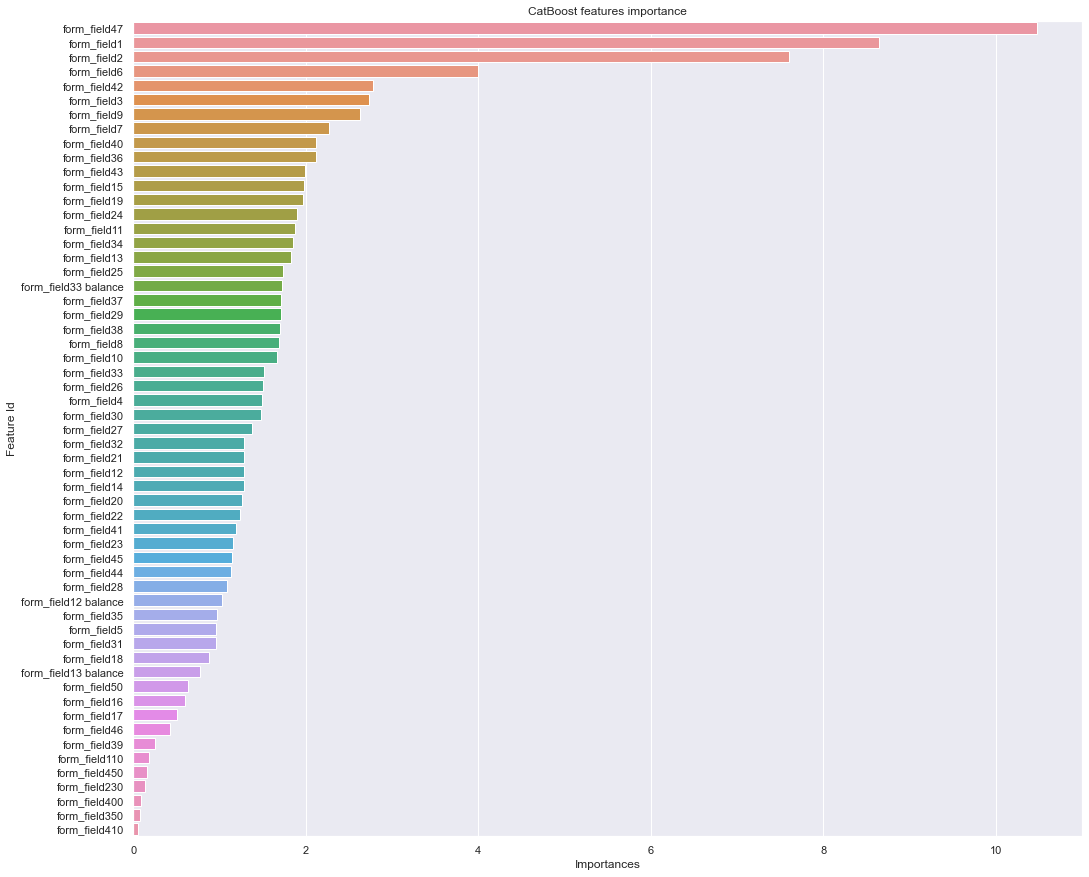

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(17, 15));
sns.barplot(x="Importances", y="Feature Id", data=feature_importance_df);
plt.title('CatBoost features importance');

from the information we have above form_field47 is the most important column in the model and the columns we created form the missing value, were the least important. but still it helps improve the model

# Testing

In [28]:
test = pd.read_csv('test.csv')  # importing the test data set


We are going to do the same feature engineering we did for the test dataset

In [29]:
#generating some features
def  feature_test2(column,column2):
    c = df[column].shape[0]
    b =np.empty((0,1),float)
    for x,y in zip(test[column],test[column2]):
            v = x-y
#             print(v)
            b = np.append(b,v)
    return b

In [30]:

a = [('form_field14' ,'form_field13' ),('form_field14' ,'form_field12') ,('form_field32' ,'form_field33')  ]

for i,j in a:
            test[j+' balance'] =feature_test2(i,j)

In [31]:
def  feature(column):
    c = test[column].shape[0]
    b =np.empty((0,1),int)
    if test[column].isnull().sum() >= 8600:
    
        for x in test[column]:
            if np.isnan(x) ==True:
#                 print(1)
                b= np.append(b,0)
            else:
#                  print(2)
                b=np.append(b,1)

    return b

In [32]:
k = ['form_field11','form_field23',
    'form_field35', 'form_field40',
     'form_field41', 'form_field45' ]

In [33]:
for i in k:
            test[i+'0'] = feature(i)

In [34]:
test_ = test.drop('form_field48', axis =1)
test_ = test_.drop('form_field49', axis =1)

# test_ = test_.drop('form_field31', axis =1)
# test_ = test

In [35]:
test_.isnull().sum()

Applicant_ID                0
form_field1              1110
form_field2              1709
form_field3               146
form_field4               146
form_field5               146
form_field6              5604
form_field7              2231
form_field8              5604
form_field9              3400
form_field10              147
form_field11            13398
form_field12             4183
form_field13             2463
form_field14                0
form_field15             9592
form_field16             5474
form_field17             4695
form_field18             4369
form_field19                0
form_field20              147
form_field21             6707
form_field22             8724
form_field23            12125
form_field24             5605
form_field25             2256
form_field26             3172
form_field27             3910
form_field28              147
form_field29              147
form_field30            10908
form_field31            16810
form_field32             2256
form_field

In [36]:
test_.form_field47.unique()

array(['charge', 'lending'], dtype=object)

In [37]:
m = {'charge':1, 'lending':2}
test_.form_field47 = test_.form_field47.map(m)


In [38]:
x_test = test_.drop('Applicant_ID', axis=1)

In [39]:
X_test = x_test

In [40]:
test

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0      Apcnt_1000032       3236.0      0.34875      10.2006       0.0000   
1      Apcnt_1000048       3284.0      1.27360       2.9606       9.0198   
2      Apcnt_1000052          NaN      0.27505       0.0600       0.0000   
3      Apcnt_1000076       3232.0      0.28505       2.8032       0.0000   
4      Apcnt_1000080       3466.0      2.09545       0.8318       2.5182   
...              ...          ...          ...          ...          ...   
23995   Apcnt_999940       3258.0      0.37925       0.5698       5.1282   
23996   Apcnt_999956       3514.0      0.95260       0.0000       0.0000   
23997   Apcnt_999976       3302.0      0.05755       4.2394       0.0000   
23998   Apcnt_999984       3334.0      0.75670       1.4428       0.0000   
23999   Apcnt_999992       3324.0      0.44840       2.3170       6.7176   

       form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0           0.0000     418564.0     418564.0     418564.0     540710.0  ...   
1           0.0000          0.0    9858816.0      49014.0    1510098.0  ...   
2           0.0000          NaN          NaN          NaN          NaN  ...   
3           0.0000          0.0     473802.0     473802.0    1724437.0  ...   
4           0.0000      19839.0    1150662.0    1150662.0    7860523.0  ...   
...            ...          ...          ...          ...          ...  ...   
23995       0.0000          NaN    2280318.0          NaN          NaN  ...   
23996       0.0000    1494538.0    4773419.0    4773419.0   89718571.0  ...   
23997      25.4376          NaN      49403.0          NaN          NaN  ...   
23998       0.0000          0.0    2513329.0      37733.0     393668.0  ...   
23999       0.0000          NaN    5305182.0          NaN   18885950.0  ...   

       form_field50  form_field13 balance  form_field12 balance  \
0          0.011221            48187375.0            48181929.0   
1          0.043525            33298400.0            33669117.0   
2               NaN                   NaN                   NaN   
3          0.104029            15356164.0            15399732.0   
4          0.163124            43407732.0            47574311.0   
...             ...                   ...                   ...   
23995           NaN            21973443.0                   NaN   
23996      0.930931            -1321822.0            47385257.0   
23997           NaN            21973443.0                   NaN   
23998      0.023749            15902709.0            16220522.0   
23999      0.391927            45155898.0            48187375.0   

       form_field33 balance  form_field110  form_field230  form_field350  \
0                  236.1666              1              0              0   
1                 1196.5000              1              0              0   
2                       NaN              1              0              0   
3                  239.0000              1              0              1   
4                 2371.3334              1              1              1   
...                     ...            ...            ...            ...   
23995               23.6666              1              0              1   
23996              571.8334              0              0              1   
23997              196.6666              1              0              0   
23998               59.3334              1              1              1   
23999             1609.1666              1              0              0   

       form_field400  form_field410  form_field450  
0                  0              0              0  
1                  0              1              1  
2                  0              0              0  
3                  0              0              0  
4                  0              0              1  
...              ...            ...            ...  
23995              0              1              0  
2399

In [41]:
def fillna(column):
    X_test[column] = X_test[column].fillna(-999)
    return X_test[column]

a = X_test.columns
fillna(a)

form_field1  form_field2  form_field3  form_field4  form_field5  \
0           3236.0      0.34875      10.2006       0.0000       0.0000   
1           3284.0      1.27360       2.9606       9.0198       0.0000   
2           -999.0      0.27505       0.0600       0.0000       0.0000   
3           3232.0      0.28505       2.8032       0.0000       0.0000   
4           3466.0      2.09545       0.8318       2.5182       0.0000   
...            ...          ...          ...          ...          ...   
23995       3258.0      0.37925       0.5698       5.1282       0.0000   
23996       3514.0      0.95260       0.0000       0.0000       0.0000   
23997       3302.0      0.05755       4.2394       0.0000      25.4376   
23998       3334.0      0.75670       1.4428       0.0000       0.0000   
23999       3324.0      0.44840       2.3170       6.7176       0.0000   

       form_field6  form_field7  form_field8  form_field9  form_field10  ...  \
0         418564.0     418564.0     418564.0     540710.0           0.0  ...   
1              0.0    9858816.0      49014.0    1510098.0    18308285.0  ...   
2           -999.0       -999.0       -999.0       -999.0           0.0  ...   
3              0.0     473802.0     473802.0    1724437.0      493641.0  ...   
4          19839.0    1150662.0    1150662.0    7860523.0     5752921.0  ...   
...            ...          ...          ...          ...           ...  ...   
23995       -999.0    2280318.0       -999.0       -999.0     2280318.0  ...   
23996    1494538.0    4773419.0    4773419.0   89718571.0    12999991.0  ...   
23997       -999.0      49403.0       -999.0       -999.0       49403.0  ...   
23998          0.0    2513329.0      37733.0     393668.0     2551062.0  ...   
23999       -999.0    5305182.0       -999.0   18885950.0     5361587.0  ...   

       form_field50  form_field13 balance  form_field12 balance  \
0          0.011221            48187375.0            48181929.0   
1          0.043525            33298400.0            33669117.0   
2       -999.000000                -999.0                -999.0   
3          0.104029            15356164.0            15399732.0   
4          0.163124            43407732.0            47574311.0   
...             ...                   ...                   ...   
23995   -999.000000            21973443.0                -999.0   
23996      0.930931            -1321822.0            47385257.0   
23997   -999.000000            21973443.0                -999.0   
23998      0.023749            15902709.0            16220522.0   
23999      0.391927            45155898.0            48187375.0   

       form_field33 balance  form_field110  form_field230  form_field350  \
0                  236.1666              1              0              0   
1                 1196.5000              1              0              0   
2                 -999.0000              1              0              0   
3                  239.0000              1              0              1   
4                 2371.3334              1              1              1   
...                     ...            ...            ...            ...   
23995               23.6666              1              0              1   
23996              571.8334              0              0              1   
23997              196.6666              1              0              0   
23998               59.3334              1              1              1   
23999             1609.1666              1              0              0   

       form_field400  form_field410  form_field450  
0                  0              0              0  
1                  0              1              1  
2                  0              0              0  
3                  0              0              0  
4                  0              0              1  
...              ...            ...            ...  
23995              0              1              0  
23996          

# Predicting

am going to use kfold validiation while predicting

In [42]:
%%time

from sklearn.model_selection import StratifiedKFold

n_fold = 4 # amount of data folds
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=SEED)


params = {
    'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 2,
          'learning_rate':0.01999999998,
          'iterations': 2000,
           'l2_leaf_reg': 40,
          'min_data_in_leaf': 12,
          #  'max_leaves': 129 ,
          'depth': 7,
#             'leaf_estimation_iterations': 9,
          'class_weights':[1,1],
          'grow_policy': 'SymmetricTree',
#           'border_count': 1010,    
          
#           'per_float_feature_quantization' : ['45:border_count=1024'],
          'nan_mode':'Min'
         }
         
test_data = Pool(data=X_test,
#                  cat_features=cat_features
                )

scores = []
prediction = np.zeros(X_test.shape[0])
prediction_xtrain = np.zeros(X_train.shape[0])
prediction_xvalid = np.zeros(X_valid.shape[0])

for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
    
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] # train and validation data splits
    y_train, y_valid = y[train_index], y[valid_index]
    
    train_data = Pool(data=X_train, 
                      label=y_train,
#                       cat_features=cat_features
                     )
    valid_data = Pool(data=X_valid, 
                      label=y_valid,
#                       cat_features=cat_features
                     )
    
    model = CatBoostClassifier(**params)
    model.fit(train_data,
              eval_set=valid_data, 
              use_best_model=True
             )
    
    score = model.get_best_score()['validation']['AUC']
    scores.append(score)

    y_pred = model.predict_proba(test_data)[:, 1]
    prediction += y_pred
    
    y_pred_train = model.predict_proba(X_train)[:, 1]
    prediction_xtrain += y_pred_train
   
    y_pred_valid = model.predict_proba(X_valid)[:, 1]
    prediction_xvalid += y_pred_valid    
    
prediction /= n_fold
prediction_xtrain /= n_fold
prediction_xvalid /= n_fold
print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))

0:	test: 0.8000112	best: 0.8000112 (0)	total: 99.7ms	remaining: 3m 19s
200:	test: 0.8404881	best: 0.8404881 (200)	total: 19.8s	remaining: 2m 57s
400:	test: 0.8434029	best: 0.8434029 (400)	total: 40.1s	remaining: 2m 39s
600:	test: 0.8445849	best: 0.8445849 (600)	total: 1m 6s	remaining: 2m 34s
800:	test: 0.8449809	best: 0.8449826 (799)	total: 1m 25s	remaining: 2m 7s
1000:	test: 0.8453923	best: 0.8453923 (1000)	total: 1m 51s	remaining: 1m 51s
1200:	test: 0.8453802	best: 0.8454442 (1082)	total: 2m 10s	remaining: 1m 26s
1400:	test: 0.8453226	best: 0.8454442 (1082)	total: 2m 29s	remaining: 1m 4s
1600:	test: 0.8452204	best: 0.8454442 (1082)	total: 2m 55s	remaining: 43.9s
1800:	test: 0.8450701	best: 0.8454442 (1082)	total: 3m 16s	remaining: 21.7s
1999:	test: 0.8449736	best: 0.8454442 (1082)	total: 3m 34s	remaining: 0us

bestTest = 0.8454441947
bestIteration = 1082

Shrink model to first 1083 iterations.
0:	test: 0.7948768	best: 0.7948768 (0)	total: 108ms	remaining: 3m 35s
200:	test: 0.8355068	

In [44]:
prediction

array([0.31905571, 0.33940264, 0.3862548 , ..., 0.2615451 , 0.53158946,
       0.18991784])

In [45]:
Summision1 = pd.DataFrame(test['Applicant_ID'])
Summision1['default_status'] = prediction
Summision1['default_status'].value_counts()


0.291134    2
0.039485    2
0.082840    2
0.309301    1
0.552587    1
           ..
0.031128    1
0.100865    1
0.051549    1
0.021804    1
0.495658    1
Name: default_status, Length: 23997, dtype: int64

In [46]:
Summision1[Summision1['default_status']>=0.5]

Applicant_ID  default_status
3      Apcnt_1000076        0.747034
7      Apcnt_1000116        0.631082
12     Apcnt_1000264        0.585849
15     Apcnt_1000328        0.647890
19     Apcnt_1000372        0.721384
...              ...             ...
23991   Apcnt_999832        0.602086
23992   Apcnt_999836        0.874367
23993   Apcnt_999852        0.618317
23995   Apcnt_999940        0.693653
23998   Apcnt_999984        0.531589

[3938 rows x 2 columns]

In [47]:
Summision1.to_csv('Summision2.csv',index =False)

we got a score of 0.844648358439733 which its difference form the best is around 0.08
![](Screens.png)